In [11]:
import ipywidgets as widgets

In [12]:
from sub_array_optimization import *
from plotting import *

nb = 4
# ps = sub_array_all_phase_shifts(sub_array_size=2, sub_array_count=2, num_of_bits=4)
ps = get_all_phase_shifts(num_elements=4, num_of_bits=nb)

ap, ep, theta = generate_patterns(phase_shifts=ps, major_spacing=1, minor_spacing=.3, number_of_bits=nb)
df = generate_dataframe_results(ap, ep, theta)

Output()

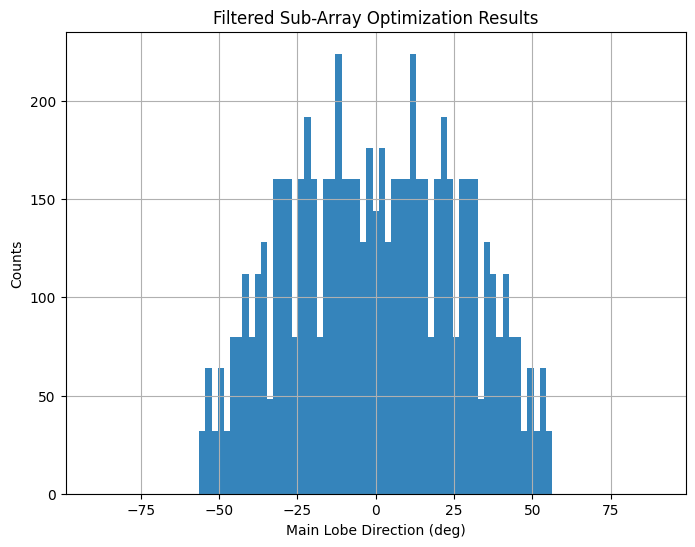

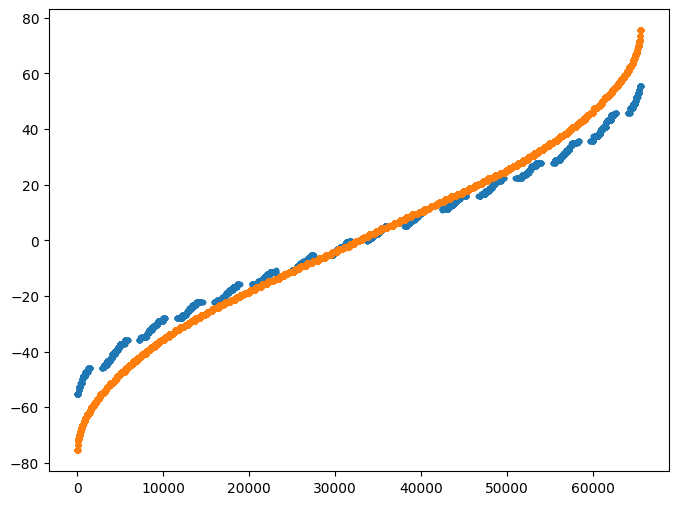

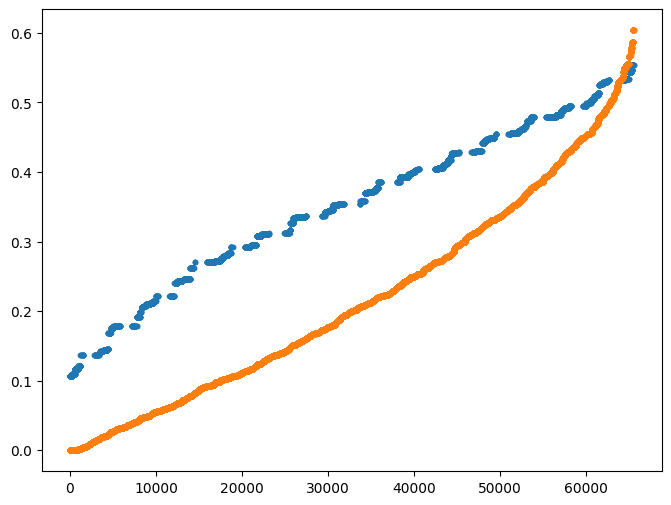

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# assume `df` exists (from your previous cell), and has the columns used below
slider1 = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01,
                              description='Side Grating Level:')
slider2 = widgets.FloatSlider(value=0.95, min=0.0, max=1.0-1e-3, step=0.01,
                              description='Main Lobe Quality:')
button1 = widgets.ToggleButton(value=False, description='show all')

out = widgets.Output()

bin_count = 91
angle_range = (-90, 90)

# create figure/axes once
fig1, ax1 = plt.subplots(figsize=(8, 6))
fig2, ax2 = plt.subplots(figsize=(8, 6))
fig3, ax3 = plt.subplots(figsize=(8, 6))

def update_plot(side_grating_level, main_lobe_quality):
    # filter data
    global filtered_df
    filtered_df = df[(df['Side Grating Level'] > side_grating_level) &
                     (df['Main Lobe Quality'] > main_lobe_quality)]
    
    global filtered_count
    filtered_count = len(filtered_df)

    with out:
        # clear output and axes to avoid re-drawing on top
        out.clear_output(wait=True)
        ax1.clear()
        ax2.clear()
        ax3.clear()

        # handle empty filtered_df gracefully
        if filtered_df.empty:
            ax1.text(0.5, 0.5, 'No results', ha='center', va='center', transform=ax1.transAxes)
            ax1.set_xlabel('Main Lobe Direction (deg)')
            ax1.set_ylabel('Counts')
            ax1.set_title('Filtered Sub-Array Optimization Results')
            display(fig1)
            return

        # draw histogram (or any other plot)
        ax1.hist(filtered_df['Main Lobe Direction (deg)'], bins=bin_count, color='C0', alpha=0.9, range=angle_range)
        if button1.value:
            ax1.hist(df['Main Lobe Direction (deg)'], bins=bin_count, color='C1', alpha=0.3, range=angle_range)
        ax1.set_xlabel('Main Lobe Direction (deg)')
        ax1.set_ylabel('Counts')
        ax1.set_title('Filtered Sub-Array Optimization Results')
        ax1.grid(True)

        # ax2.plot(df["Phase Shift Index"],df['Main Lobe Direction (deg)'])
        # ax2.plot(filtered_df["Phase Shift Index"],filtered_df['Main Lobe Direction (deg)'])
        ax2.plot(filtered_df["Phase Shift Index"], sorted(filtered_df["Main Lobe Direction (deg)"]), label='Main Lobe Direction (deg)', marker='.', linestyle='')
        ax2.plot(df["Phase Shift Index"], sorted(df["Main Lobe Direction (deg)"]), label='Main Lobe Direction (deg)', marker='.', linestyle='')
        
        ax3.plot(filtered_df["Phase Shift Index"], sorted(filtered_df["Side Grating Level"]), label='Side Grating Level', marker='.', linestyle='')
        ax3.plot(df["Phase Shift Index"], sorted(df["Side Grating Level"]), label='Side Grating Level', marker='.', linestyle='')

        global stats
        stats = widgets.Text(value=f"Filtered Results: {filtered_count} / {len(df)}")
        display(stats)
        
        # show the updated figure in the output widget
        display(fig1)
        display(fig2)
        display(fig3)

# initial draw
update_plot(slider1.value, slider2.value)

# connect observers
slider1.observe(lambda change: update_plot(slider1.value, slider2.value), names='value')
slider2.observe(lambda change: update_plot(slider1.value, slider2.value), names='value')
button1.observe(lambda change: update_plot(slider1.value, slider2.value), names='value')

# layout
controls = widgets.HBox([slider1, slider2, button1])
display(controls, out)

In [14]:

slider3 = widgets.IntSlider(value=0, min=0, max=len(df)-1, step=1,
                            description='Index:')

button_db = widgets.ToggleButton(value=True, description='dB Scale')

out2 = widgets.Output()

def update_details(index):
  with out2:
      out2.clear_output(wait=True)
      if index < 0 or index >= len(df):
          print("Index out of range")
          return
      row = df.iloc[index]
      print(f"Details for index {index}:")
      print(row)
      # Optionally, plot the array pattern for this index
      pattern = ap
      fig, ax = plt.subplots(figsize=(8, 6))
      plot_pattern(ax, pattern[index, :], theta, decibel=button_db.value, element_pattern=ep)
      plt.title(f'Array Pattern for Index {index}')
      plt.show()
        
# initial draw
update_details(slider3.value)

# connect observer
slider3.observe(lambda change: update_details(slider3.value), names='value')
button_db.observe(lambda change: update_details(slider3.value), names='value')
# layout
display(slider3, button_db, out2)


IntSlider(value=0, description='Index:', max=65535)

ToggleButton(value=True, description='dB Scale')

Output()

In [15]:

slider4 = widgets.IntSlider(value=0, min=0, max=len(filtered_df)-1, step=1,
                            description='Index:')


out3 = widgets.Output()

def update_details_filtered(index):
    slider4.max = len(filtered_df)-1
    with out3:
        out3.clear_output(wait=True)
        if index < 0 or index >= len(filtered_df):
            print("Index out of range")
            return
        row = filtered_df.iloc[index]
        print(f"Details for index {index}:")
        print(row)
        # Optionally, plot the array pattern for this index
        pattern_index =  filtered_df.index[index]
        pattern = ap
        fig, ax = plt.subplots(figsize=(8, 6))
        plot_pattern(ax, pattern[pattern_index, :], theta, decibel=button_db.value, element_pattern=ep)
        plt.title(f'Array Pattern for Index {index}')
        plt.show()
        
# initial draw
update_details_filtered(slider4.value)

# connect observer
slider4.observe(lambda change: update_details_filtered(slider4.value), names='value')
button_db.observe(lambda change: update_details_filtered(slider4.value), names='value')
# layout
display(widgets.HBox([slider4, button_db]), out3)

Output()